# Exploratory Data Analysis - Terrorism 

## Author - Sarvesh Nitin Khade

Dataset - https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns\



In [2]:
data = pd.read_csv("C:\Project Files\GlobalT\T.csv", encoding='latin1')
df = pd.DataFrame(data)
print("Data has been imported")
df.head()

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_2632\150615092.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\Project Files\GlobalT\T.csv", encoding='latin1')


Data has been imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
data.shape


(181691, 135)

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
for i in df.columns:
    print(i,end=',')

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

# Cleaning the Data

In [7]:
df = df [["iyear", "imonth","iday","country_txt", "region_txt", "provstate","city","latitude","longitude", "location", "summary",
         "attacktype1_txt","targtype1_txt", "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [8]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province","attacktype1_txt":"Attack Type",
                  "city":"City","latitude":"Latitude","longitude":"Longitude","location":"location","summary":"Summary","gname":"Group Name","nkill":"Killed", "nwound":"Wounded"},inplace=True)

In [10]:
df.head()

,Year,Month,Day,Country,Region,Province,City,Latitude,Longitude,location,Summary,Attack Type,targtype1_txt,Group Name,motive,weaptype1_txt,Killed,Wounded,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   Region         181691 non-null  object 
 5   Province       181270 non-null  object 
 6   City           181257 non-null  object 
 7   Latitude       177135 non-null  float64
 8   Longitude      177134 non-null  float64
 9   location       55495 non-null   object 
 10  Summary        115562 non-null  object 
 11  Attack Type    181691 non-null  object 
 12  targtype1_txt  181691 non-null  object 
 13  Group Name     181691 non-null  object 
 14  motive         50561 non-null   object 
 15  weaptype1_txt  181691 non-null  object 
 16  Killed         171378 non-null  float64
 17  Wounded        165380 non-nul

In [12]:
df.shape

(181691, 19)

In [13]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province            421
City                434
Latitude           4556
Longitude          4557
location         126196
Summary           66129
Attack Type           0
targtype1_txt         0
Group Name            0
motive           131130
weaptype1_txt         0
Killed            10313
Wounded           16311
addnotes         153402
dtype: int64

In [14]:
df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)
df["Casualty"] = df["Wounded"] + df["Killed"]

In [15]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [16]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province            421
City                434
Latitude           4556
Longitude          4557
location         126196
Summary           66129
Attack Type           0
targtype1_txt         0
Group Name            0
motive           131130
weaptype1_txt         0
Killed                0
Wounded               0
addnotes         153402
Casualty              0
dtype: int64

## Observations
1. Data consist of terrorist activities from 1970 to 2017
2. Maximum number of deaths were 1570 
3. Maximum number of wounded were 8191
4. Max Casualties were 9574

#  Visualizing the data 


1. Year Wise Attack 

In [17]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attack"}).set_index("Year")
attacks.head()

,Attack
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


Text(0, 0.5, 'Number Of Attacks')

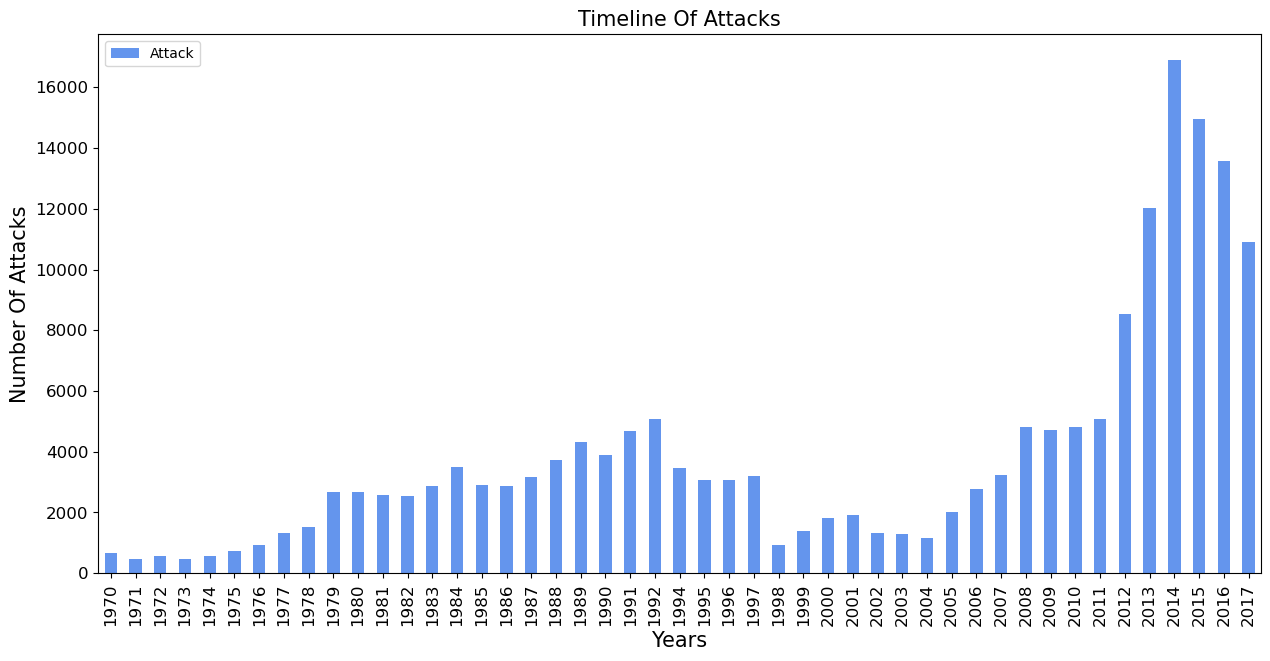

In [18]:
attacks.plot(kind="bar", color = "cornflowerblue", figsize=(15,7),fontsize = 12)
plt.title("Timeline Of Attacks",fontsize = "15")
plt.xlabel("Years", fontsize = "15")
plt.ylabel("Number Of Attacks", fontsize = "15")


## Observations 
1. 2014 was the year where terrorist activities were at peak 
2. In 1971 and 1973 terrorist activites were minimum 

## Casualties 


In [19]:
cas = df[["Year", "Casualty"]].groupby("Year").sum()
cas.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


Text(0, 0.5, 'Number Of Casulty')

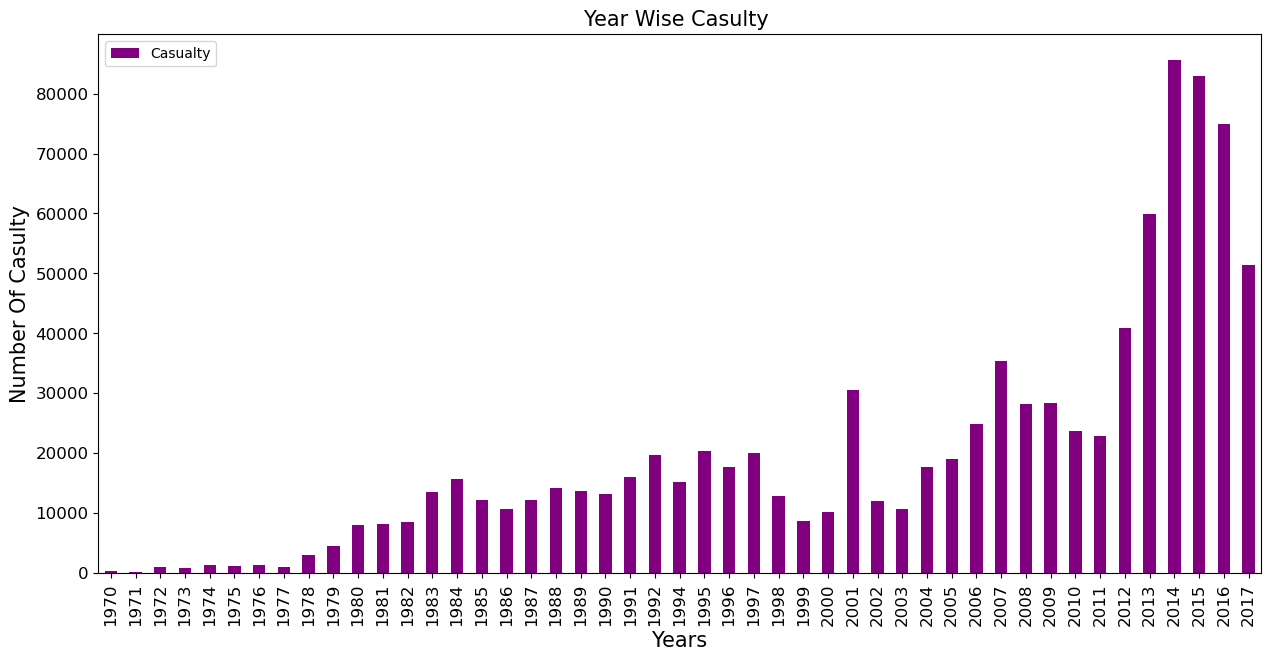

In [20]:
cas.plot(kind="bar", color = "purple", figsize=(15,7),fontsize = 12)
plt.title("Year Wise Casulty ",fontsize = "15")
plt.xlabel("Years", fontsize = "15")
plt.ylabel("Number Of Casulty", fontsize = "15")


In [21]:
wou = df[["Year","Wounded"]].groupby("Year").sum()
wou.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number Of Wounded')

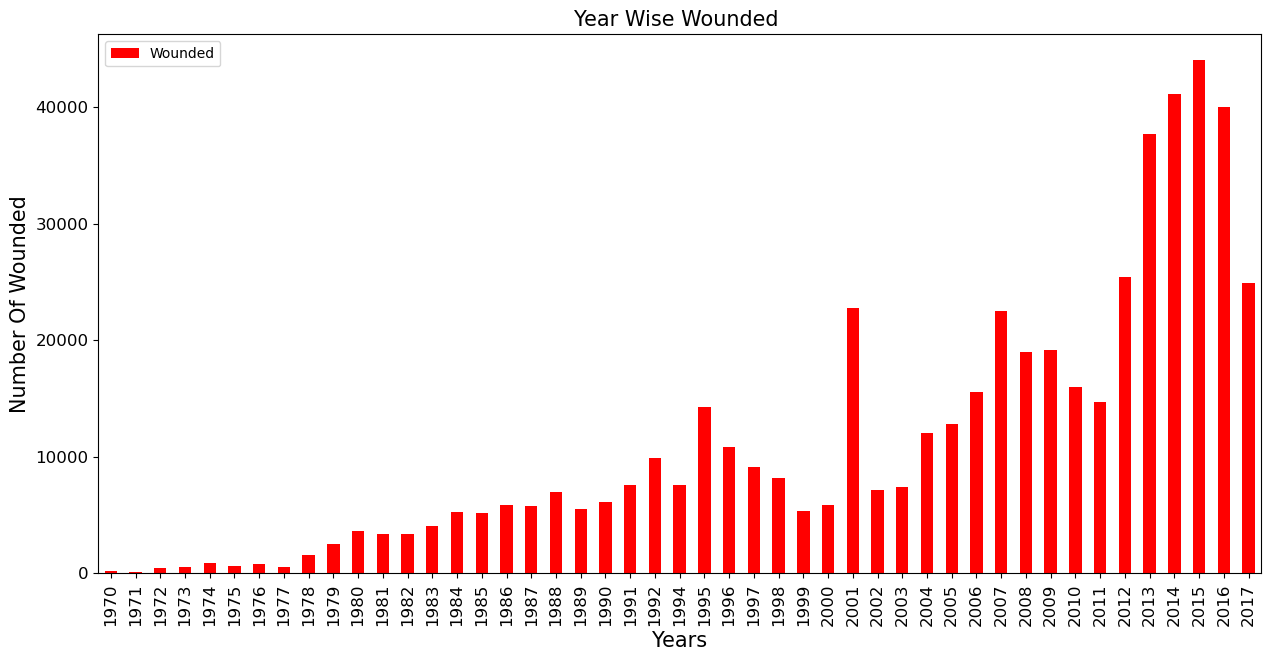

In [22]:
wou.plot(kind="bar", color = "red", figsize=(15,7),fontsize = 12)
plt.title("Year Wise Wounded ",fontsize = "15")
plt.xlabel("Years", fontsize = "15")
plt.ylabel("Number Of Wounded", fontsize = "15")


## Region Wise Wounded 

In [23]:
reg = pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


Text(0, 0.5, 'Number of Attacks')

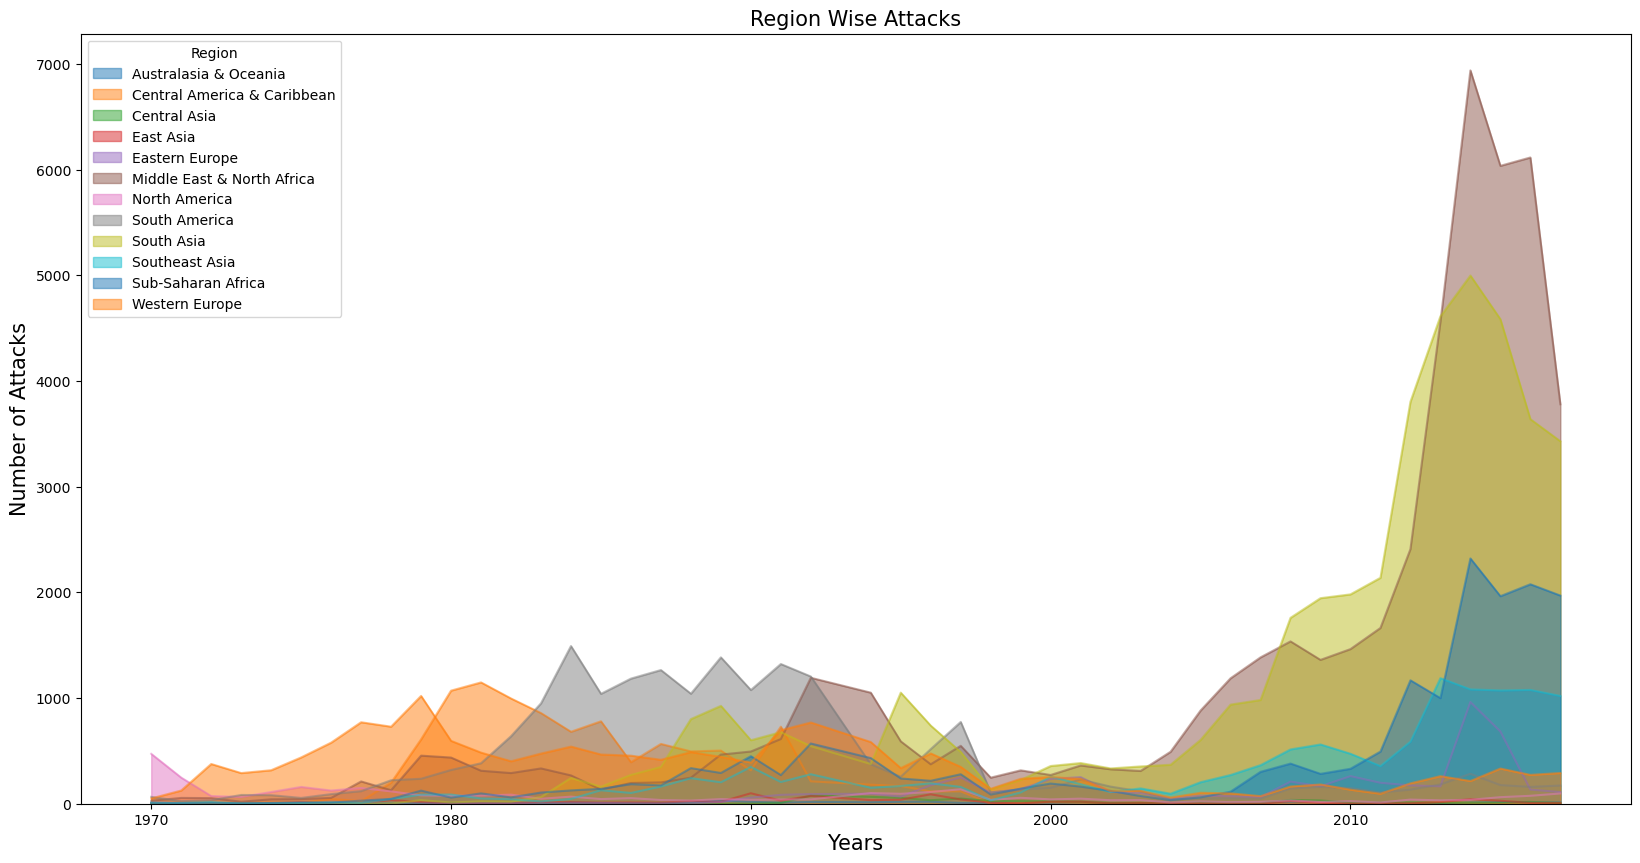

In [24]:
reg.plot(kind="area", stacked=False, alpha = 0.5, figsize = (20,10))
plt.title("Region Wise Attacks", fontsize = 15)
plt.xlabel("Years",fontsize  = 15)
plt.ylabel("Number of Attacks", fontsize = 15)

In [25]:
regt = reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra = regt["Total"].sort_values(ascending = False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

Text(0, 0.5, 'Number Of Attacks ')

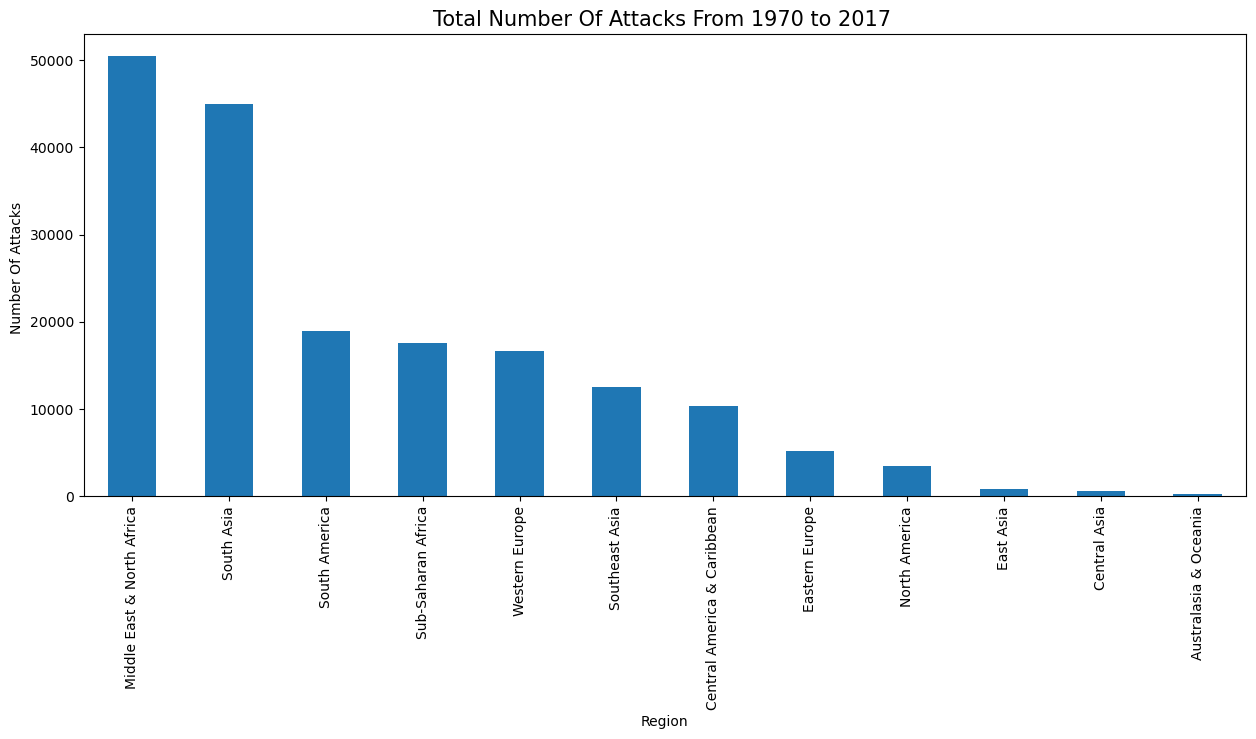

In [26]:
ra.plot(kind = "bar", figsize = (15,6))
plt.title("Total Number Of Attacks From 1970 to 2017 ", fontsize = "15")
plt.xlabel("Region")
plt.ylabel("Number Of Attacks ")

In [27]:
rc = df [["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


Text(0, 0.5, 'Number of Casualties')

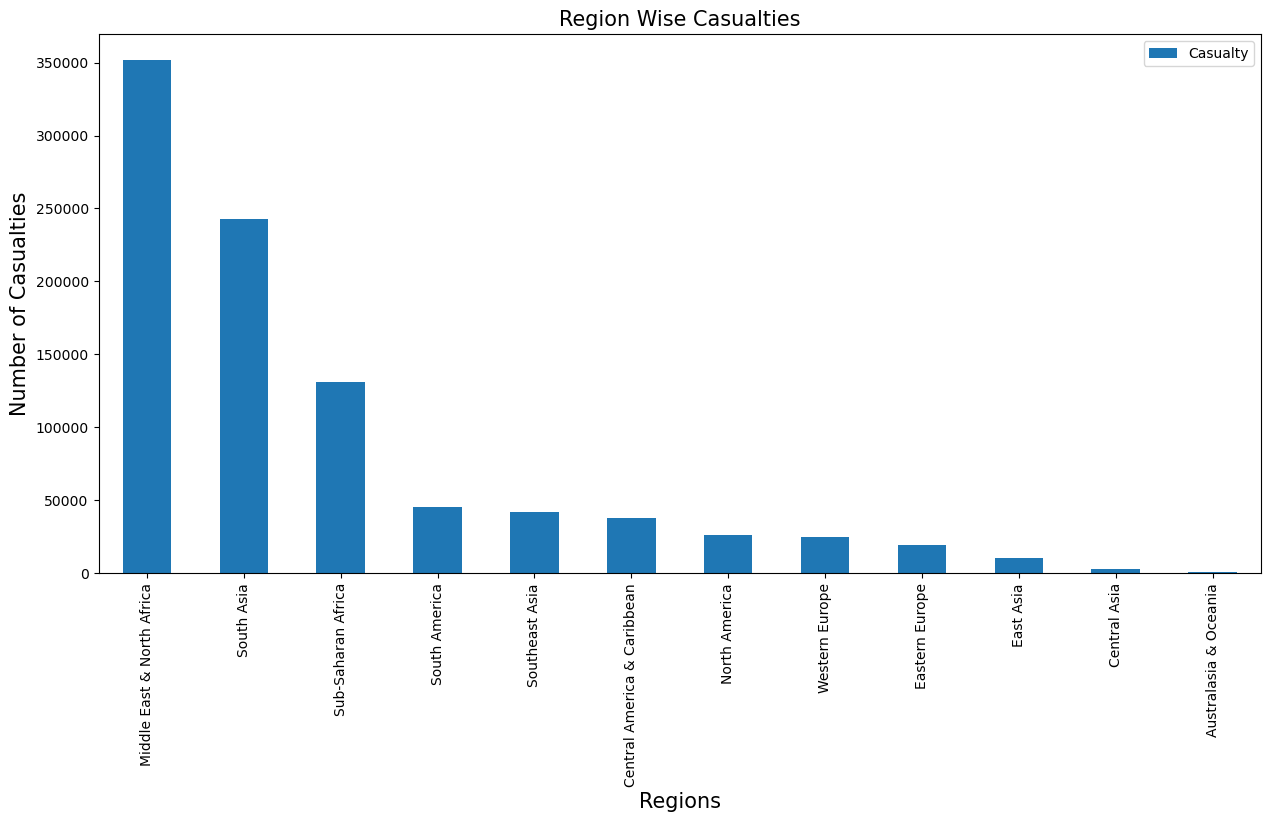

In [28]:
rc.plot(kind="bar", figsize = (15,7))
plt.title("Region Wise Casualties", fontsize = 15)
plt.xlabel("Regions",fontsize  = 15)
plt.ylabel("Number of Casualties", fontsize = 15)

In [29]:
rk = df [["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


Text(0, 0.5, 'Number of Killing')

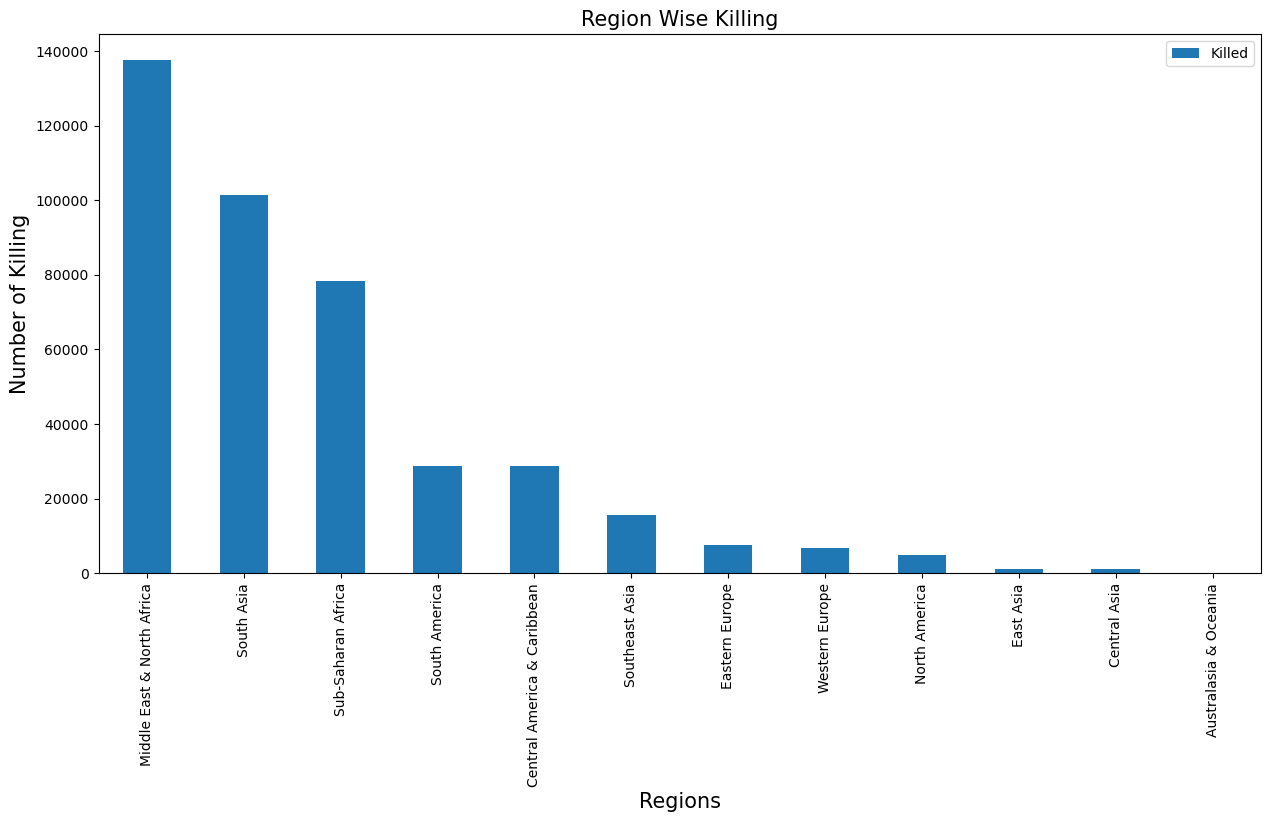

In [30]:
rk.plot(kind="bar", figsize = (15,7))
plt.title("Region Wise Killing", fontsize = 15)
plt.xlabel("Regions",fontsize  = 15)
plt.ylabel("Number of Killing", fontsize = 15)

## Country Wise Attack Top 10 

In [31]:
ct = df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Text(0, 0.5, 'Number of Attacks')

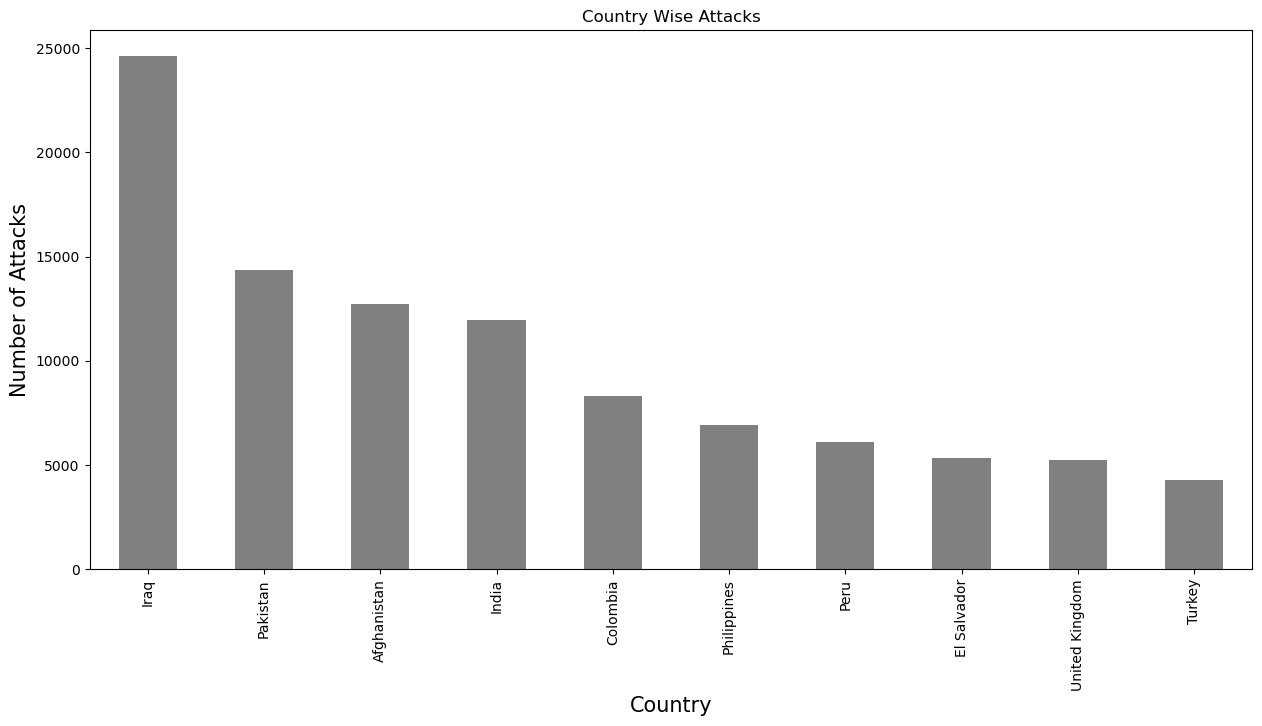

In [32]:
ct.plot(kind="bar", figsize = (15,7), color ="gray")
plt.title("Country Wise Attacks")
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Number of Attacks", fontsize= (15))

## Total Casualties in each country

In [33]:
cnc = df [["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head()

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0


Text(0, 0.5, 'Number of Casualty')

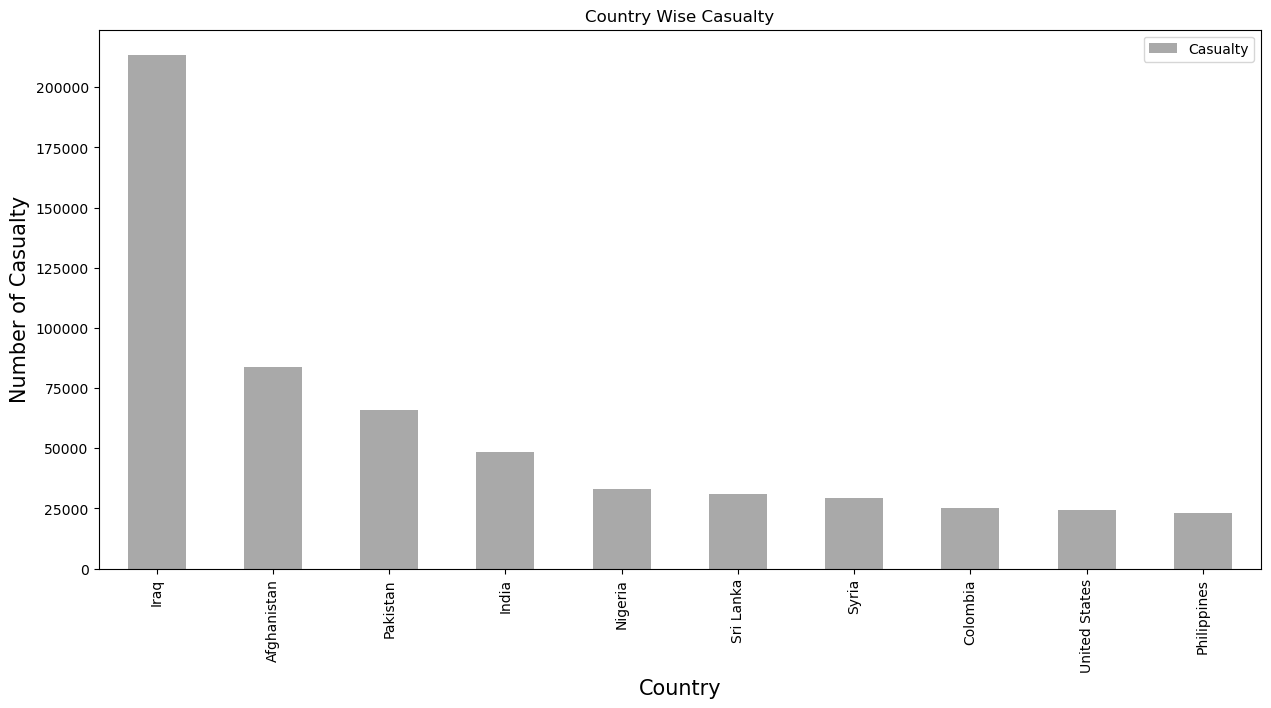

In [34]:
cnc[:10].plot(kind="bar", figsize = (15,7), color ="DarkGray")
plt.title("Country Wise Casualty")
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Number of Casualty", fontsize= (15))

## Country Wise Killing


In [35]:
cnk = df [["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnc.head()

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0


Text(0, 0.5, 'Number of Killings')

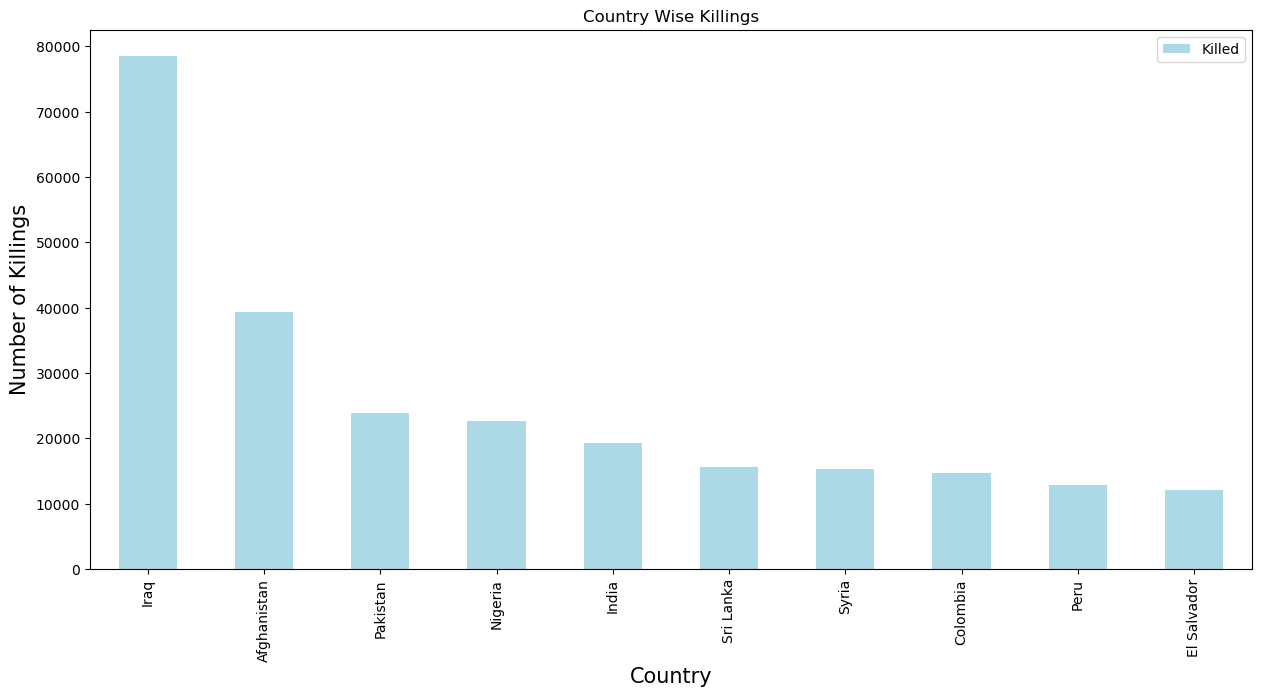

In [36]:
cnk[:10].plot(kind="bar", figsize = (15,7), color ="lightblue")
plt.title("Country Wise Killings")
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Number of Killings", fontsize= (15))

## Country Wise Wounded 


In [37]:
cnw = df [["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnc.head()

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0


Text(0, 0.5, 'Number of Wounded')

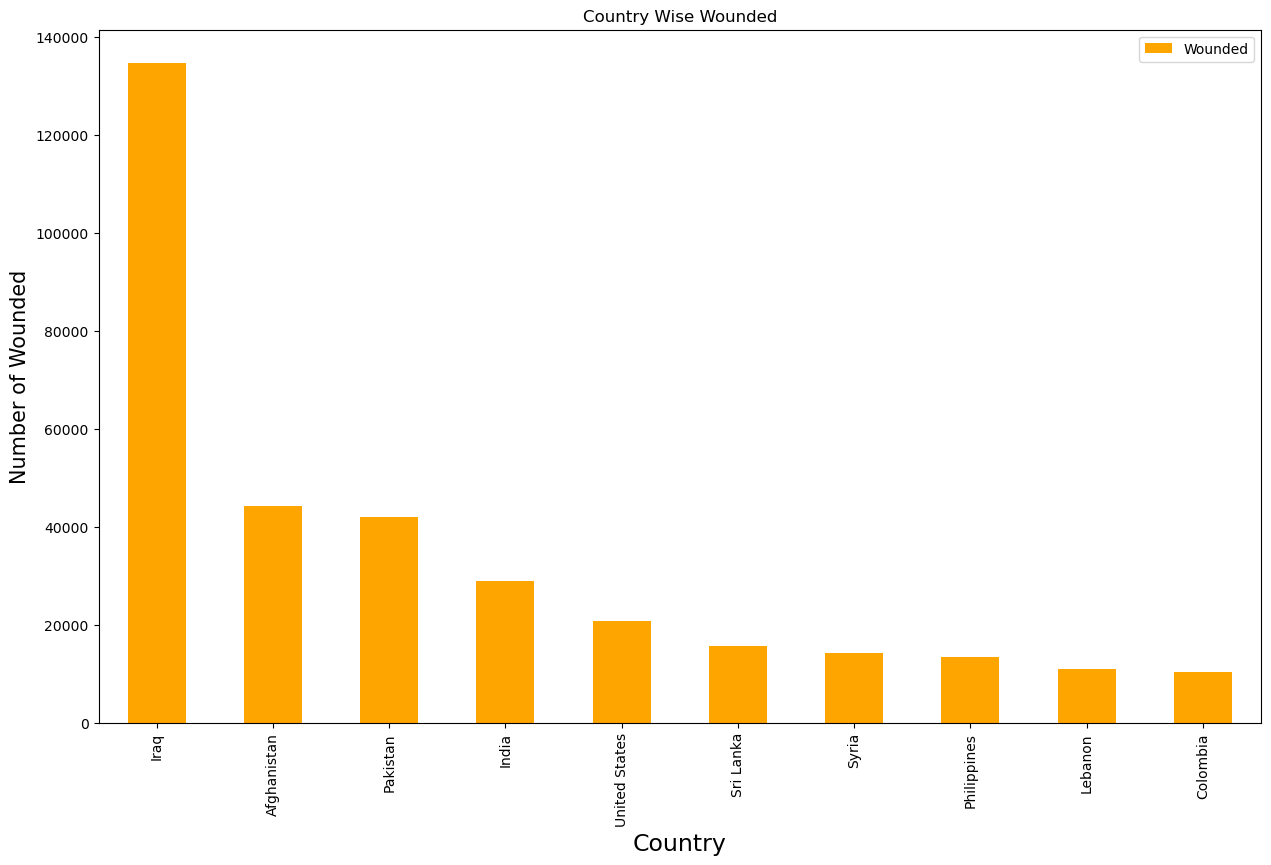

In [38]:
cnw[:10].plot(kind="bar", figsize = (15,9), color ="Orange")
plt.title("Country Wise Wounded")
plt.xlabel("Country", fontsize = 17)
plt.ylabel("Number of Wounded", fontsize= (15))

## City Wise Analysis

In [39]:
city = df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

Text(0, 0.5, 'Number of Wounded')

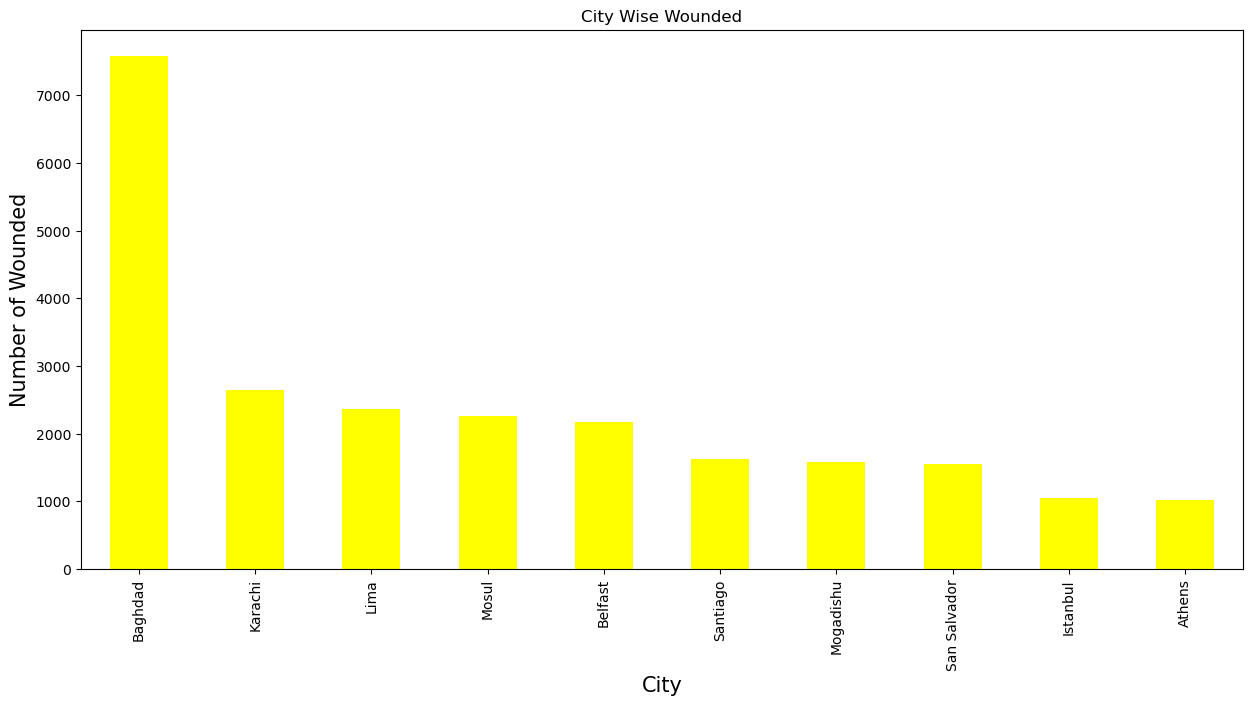

In [40]:
city[:10].plot(kind="bar", figsize = (15,7), color ="Yellow")
plt.title("City Wise Wounded")
plt.xlabel("City", fontsize = 15)
plt.ylabel("Number of Wounded", fontsize= (15))

## Terrorist group wise attacks


In [41]:
group = df["Group Name"].value_counts()[1:10]
group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

Text(0, 0.5, 'Number of Attacks')

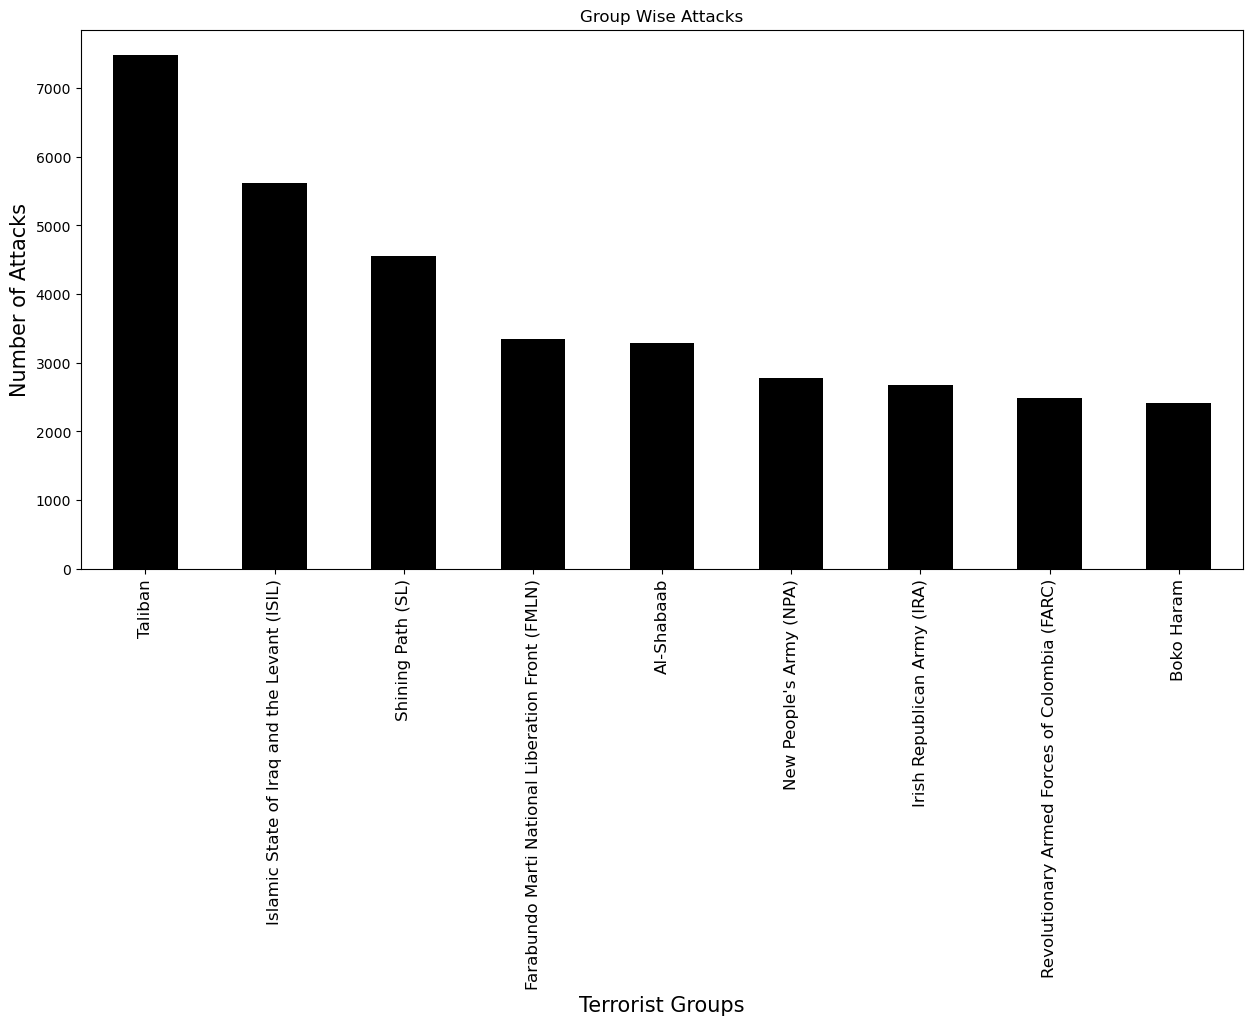

In [42]:
group[:10].plot(kind="bar", figsize = (15,7), color ="Black")
plt.title("Group Wise Attacks")
plt.xlabel("Terrorist Groups", fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize= (15))

In [45]:
tc = df [["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False)
tc.head(10)

,Casualty
Group Name,
Unknown,322706.0
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0


Text(0, 0.5, 'Number of Attacks')

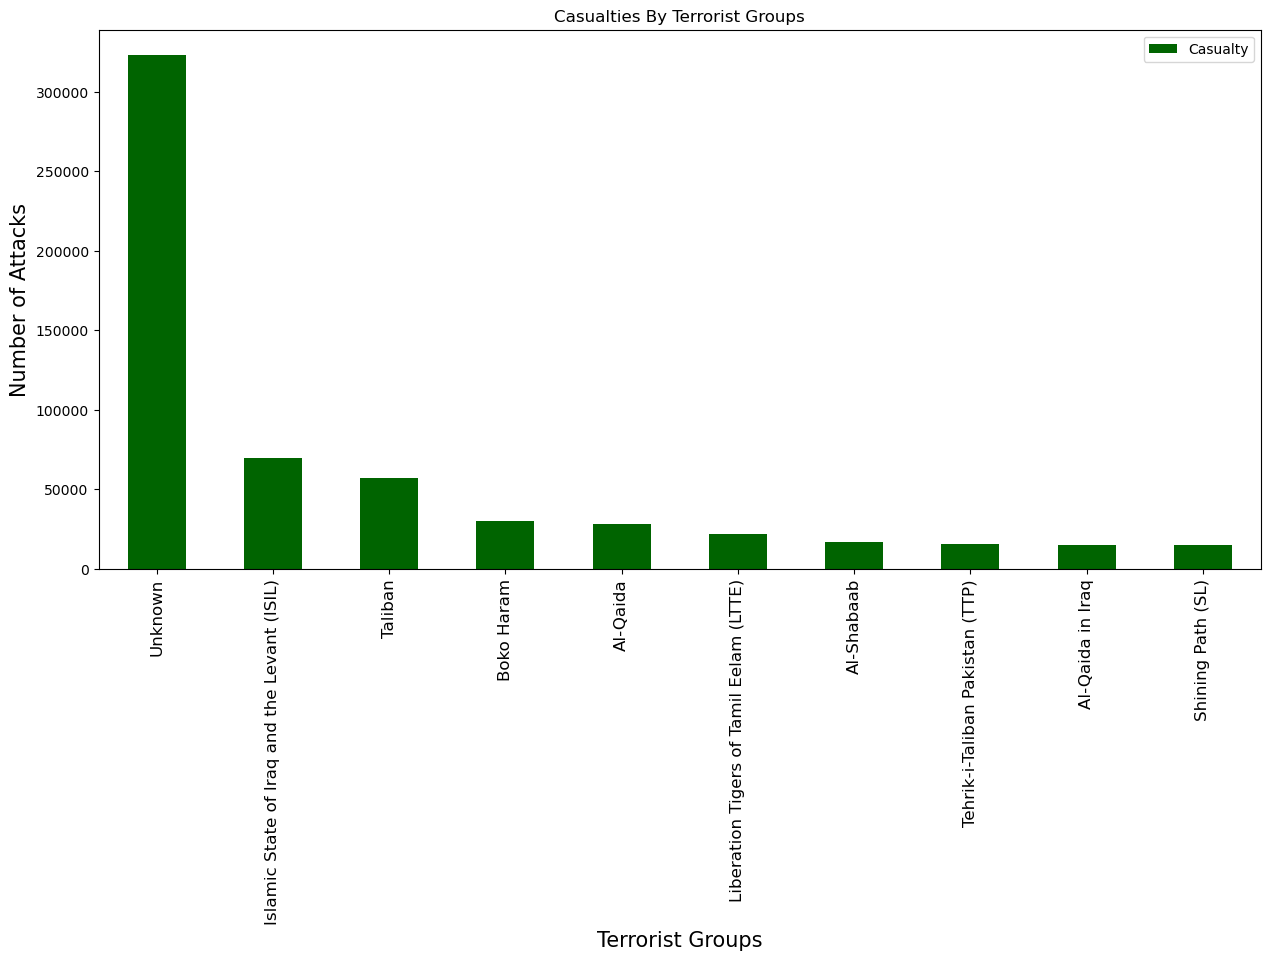

In [68]:
tc[:10].plot(kind="bar", figsize = (15,7), color = "DarkGreen")
plt.title("Casualties By Terrorist Groups")
plt.xlabel("Terrorist Groups",fontsize=15)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 15)

In [54]:
tk = df[["Group Name", "Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False)
tk.head()

,Killed
Group Name,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0


Text(0, 0.5, 'Number of Attacks')

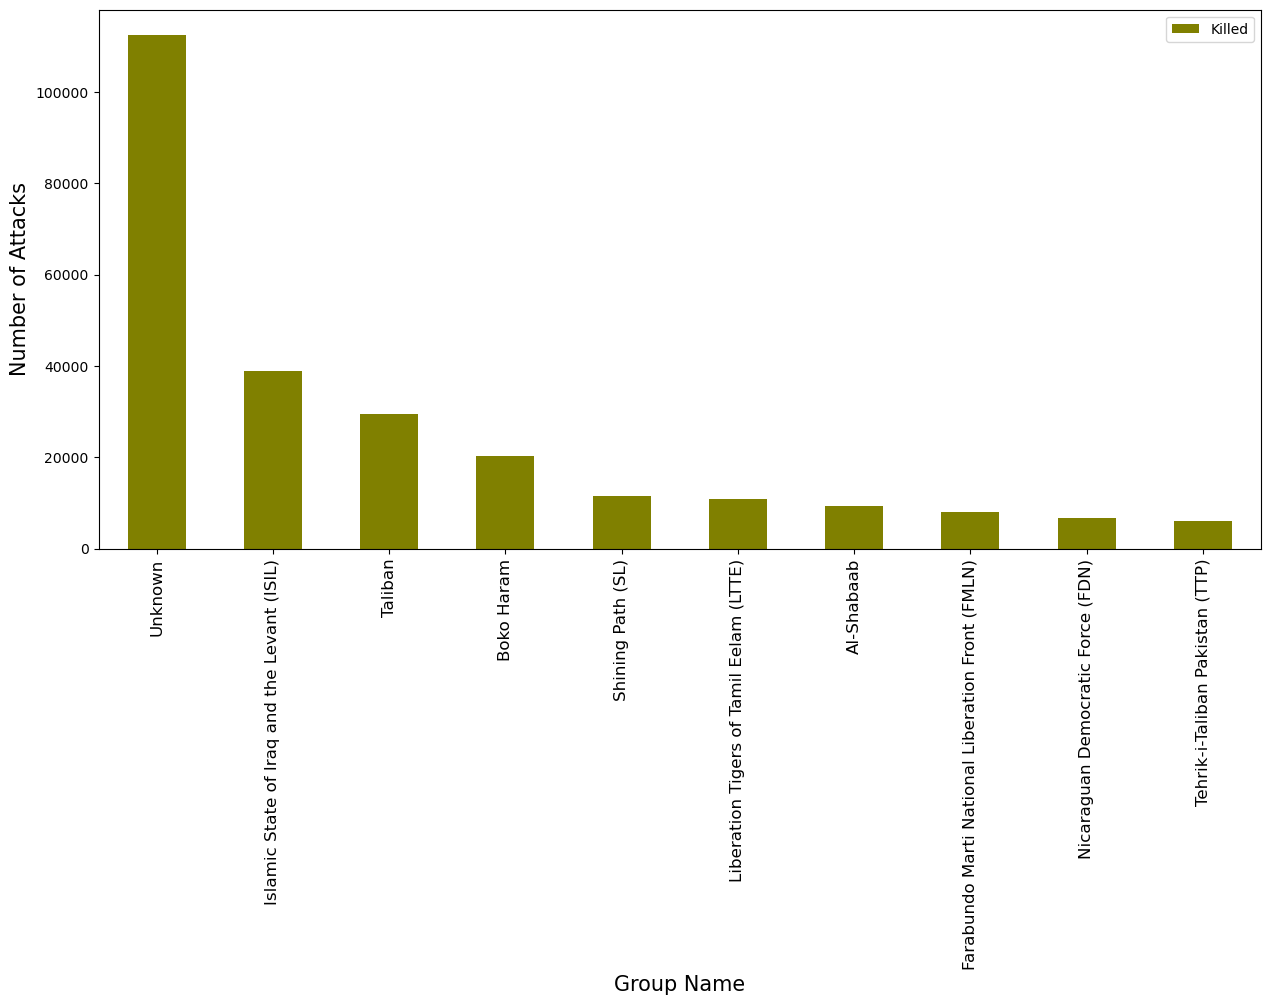

In [67]:
tk[:10].plot(kind="bar",figsize=(15,7),color = "Olive")
plt.xlabel("Group Name",fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 15)


## Attack Type 
1. Number Of Type Of Attacks

In [61]:
at = df["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

Text(0, 0.5, 'Number of Attacks')

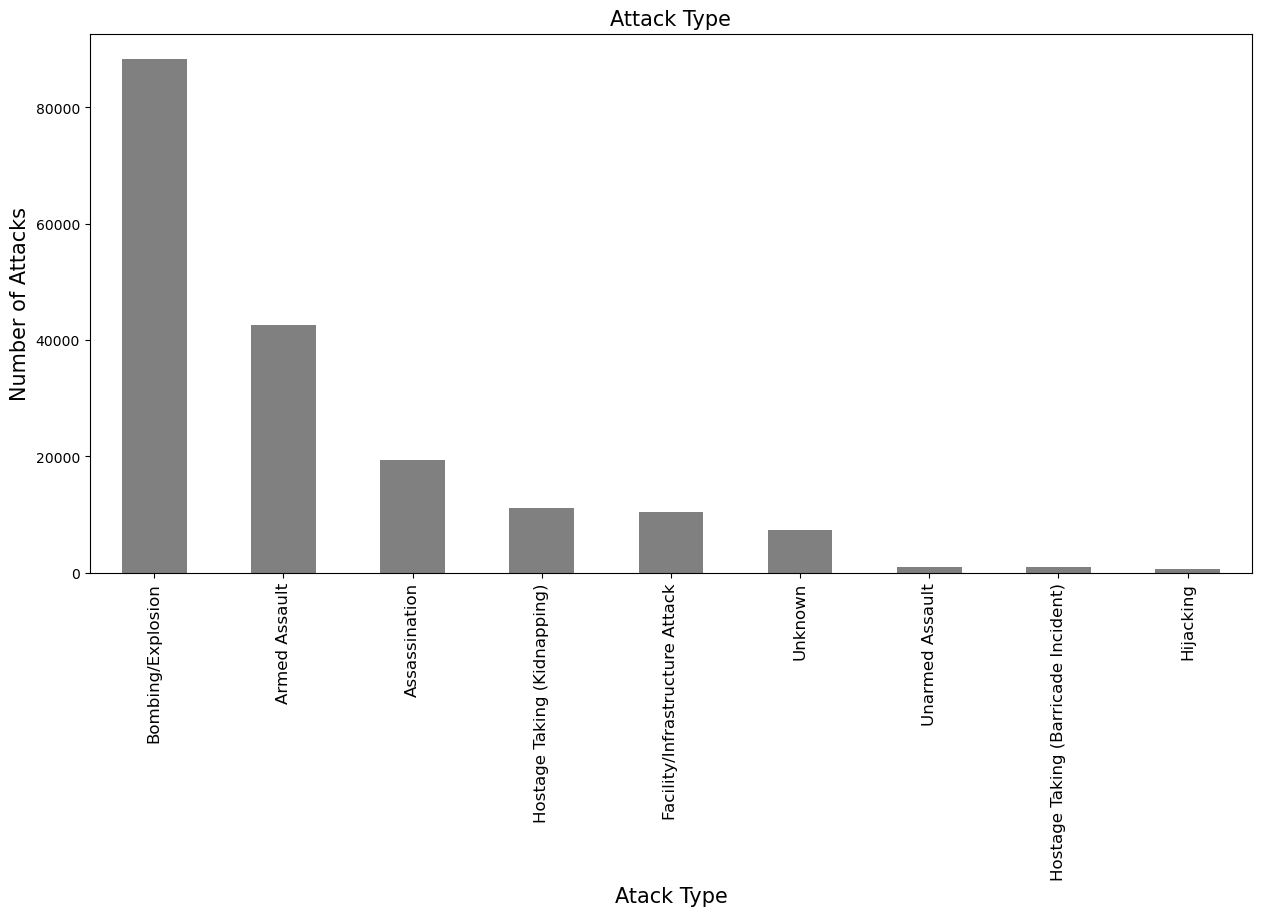

In [70]:
at.plot(kind = "bar", figsize=(15,7), color = "Gray")
plt.title("Attack Type",fontsize = 15)
plt.xlabel("Atack Type",fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 15)

In [87]:
ac = df[["Attack Type", "Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending = False)
ak = df[["Attack Type", "Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending = False)
ac.head()


,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0


In [88]:
ak.head()

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0


Text(0, 0.5, 'Number of Attacks')

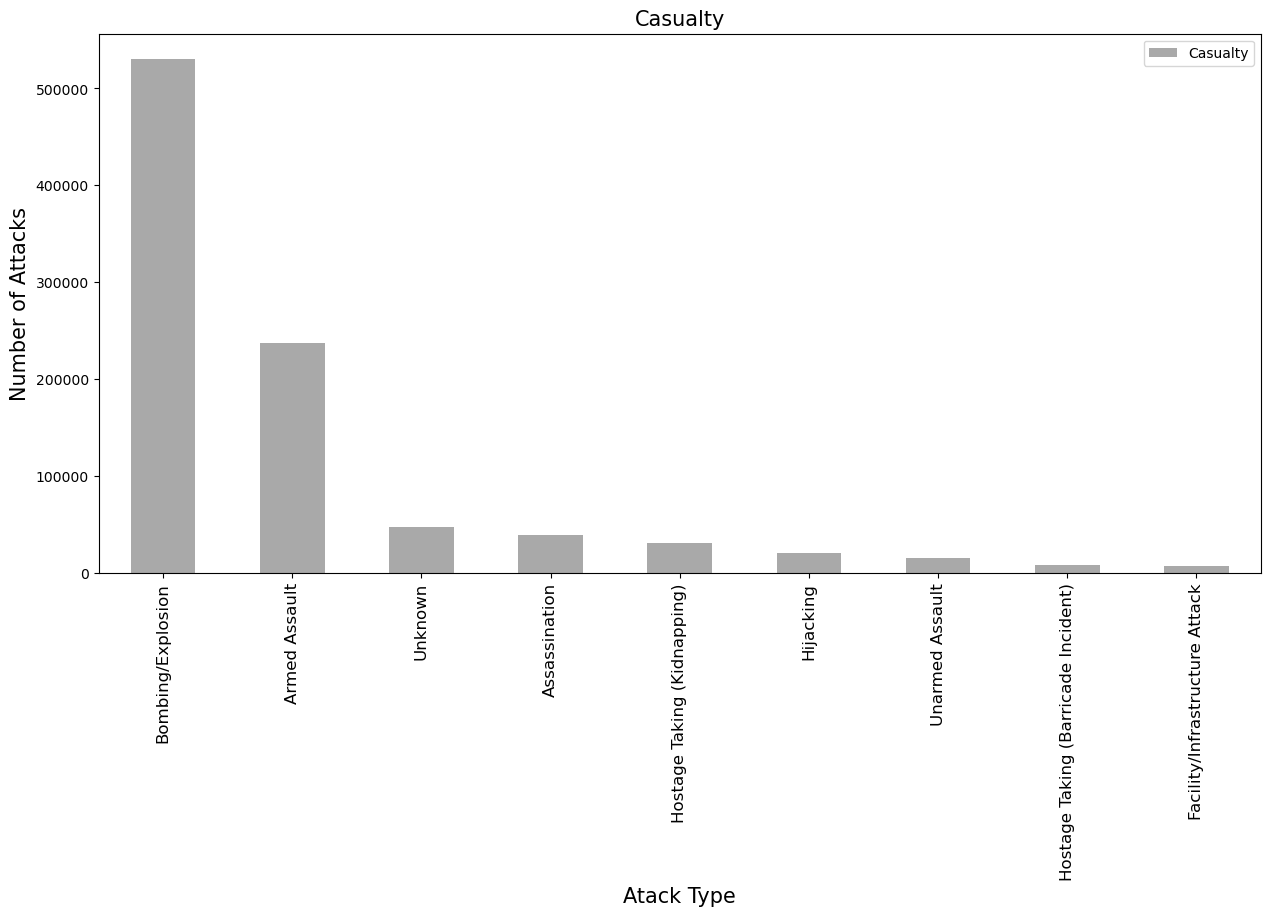

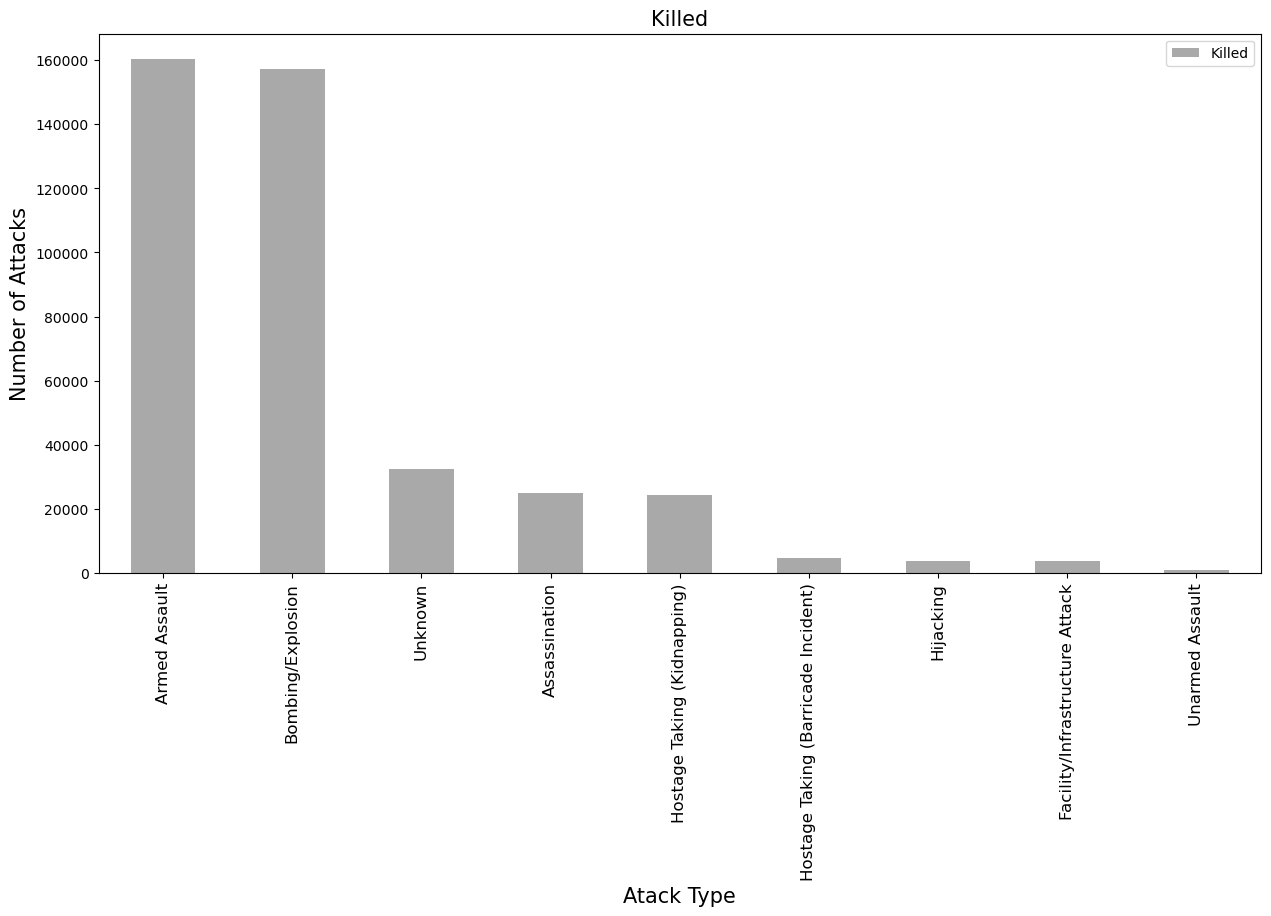

In [90]:
ac.plot(kind = "bar", figsize=(15,7), color = "DarkGray")
plt.title("Casualty",fontsize = 15)
plt.xlabel("Atack Type",fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 15)
ak.plot(kind = "bar", figsize=(15,7), color = "DarkGray")
plt.title("Killed",fontsize = 15)
plt.xlabel("Atack Type",fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel("Number of Attacks", fontsize = 15)



## Target Type wise Attacks

In [95]:
td = df["targtype1_txt"].value_counts()
td.head()

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: targtype1_txt, dtype: int64

Text(0, 0.5, 'Number of Attacks')

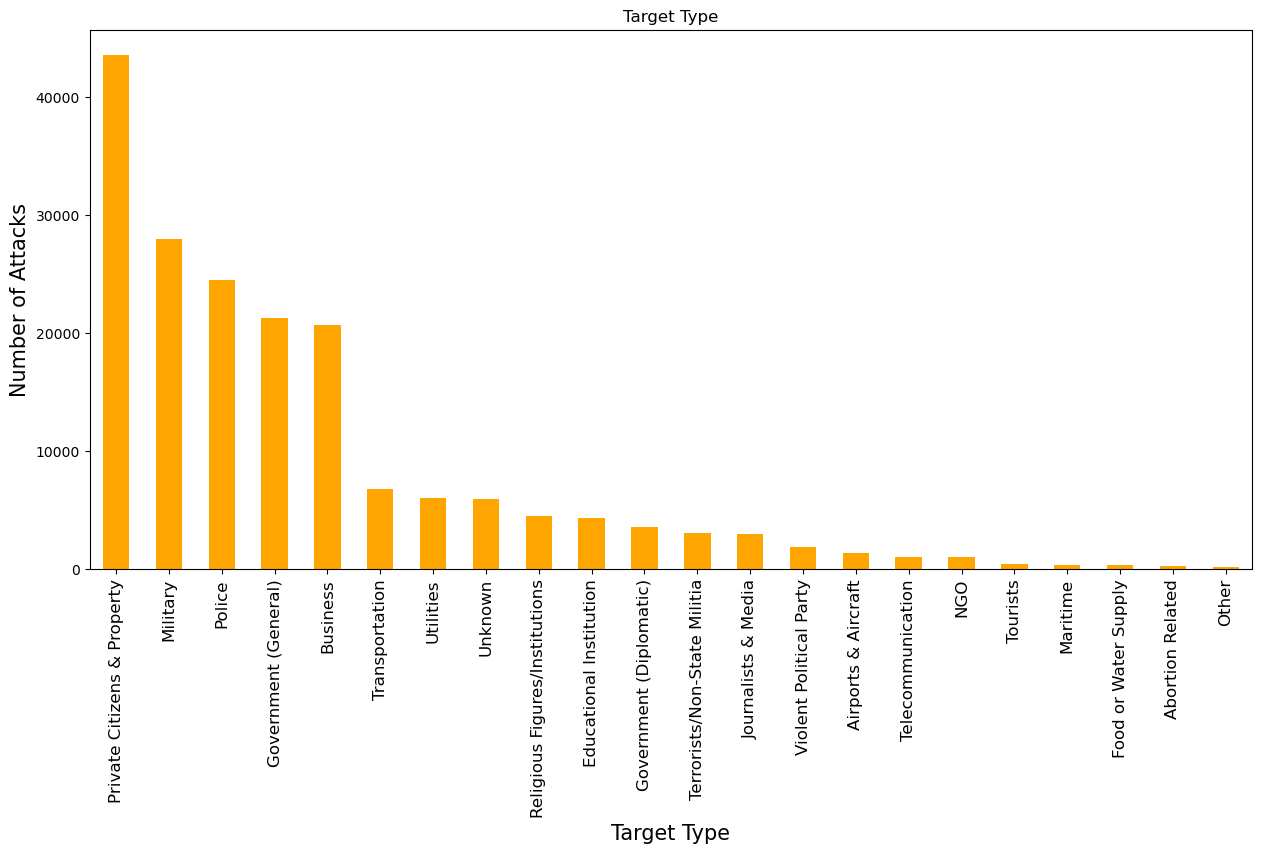

In [96]:
td.plot(kind="bar", figsize=(15,7),color= "orange")
plt.title("Target Type")
plt.xticks(fontsize = 12)
plt.xlabel("Target Type",fontsize = 15)
plt.ylabel("Number of Attacks", fontsize = 15)

In [102]:
tck = df[["targtype1_txt", "Killed"]].groupby("targtype1_txt").sum().sort_values(by="Killed",ascending=False)
tcc = df[["targtype1_txt", "Casualty"]].groupby("targtype1_txt").sum().sort_values(by="Casualty",ascending=False)
tck.head()

,Killed
targtype1_txt,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0


In [99]:
tcc.head()

,Casualty
targtype1_txt,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0


Text(0, 0.5, 'Number of Attacks')

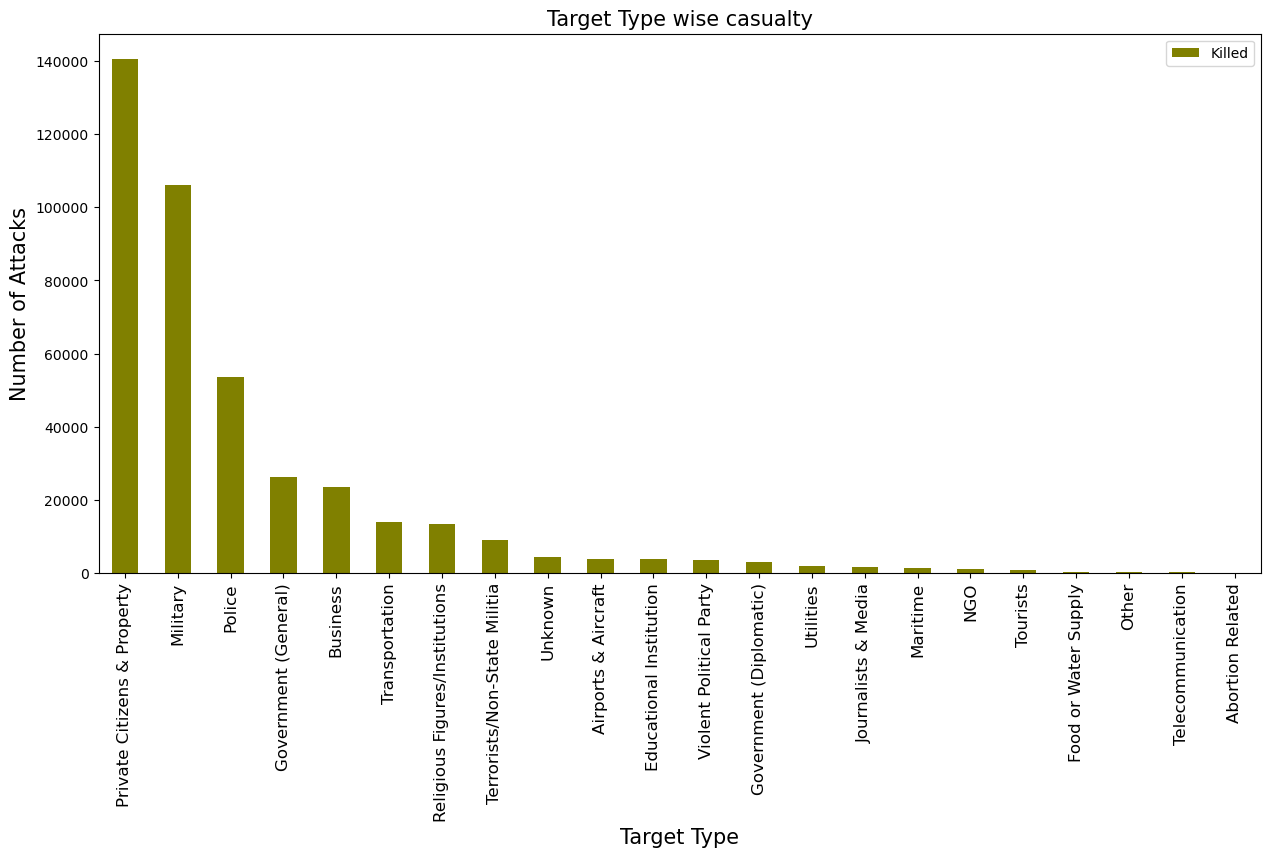

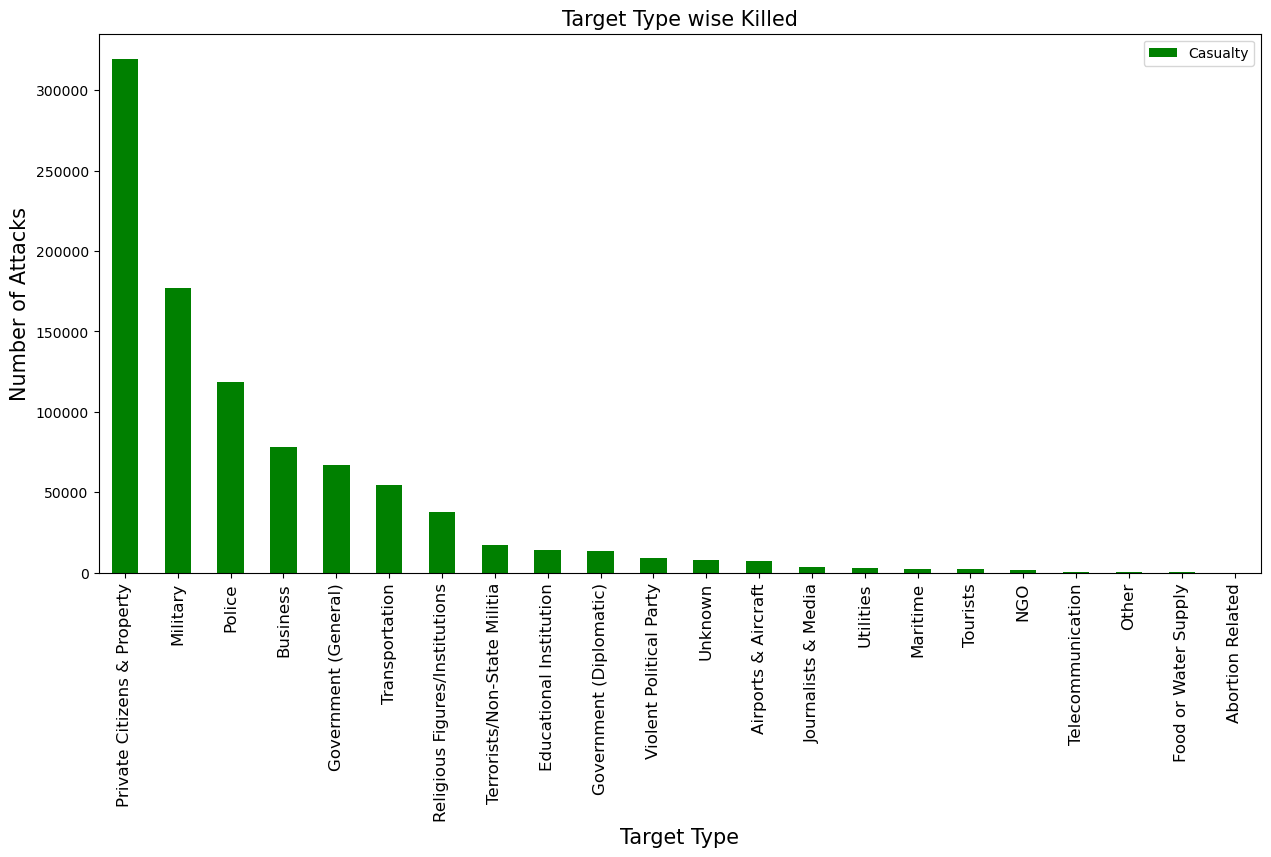

In [106]:
tck.plot(kind="bar", figsize=(15,7),color= "olive")
plt.title("Target Type wise casualty",fontsize = 15)
plt.xticks(fontsize = 12)
plt.xlabel("Target Type",fontsize = 15)
plt.ylabel("Number of Attacks", fontsize = 15)

tcc.plot(kind="bar", figsize=(15,7),color= "green")
plt.title("Target Type wise Killed",fontsize = 15)
plt.xticks(fontsize = 12)
plt.xlabel("Target Type",fontsize = 15)
plt.ylabel("Number of Attacks", fontsize = 15)

In [107]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_2632\390661980.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

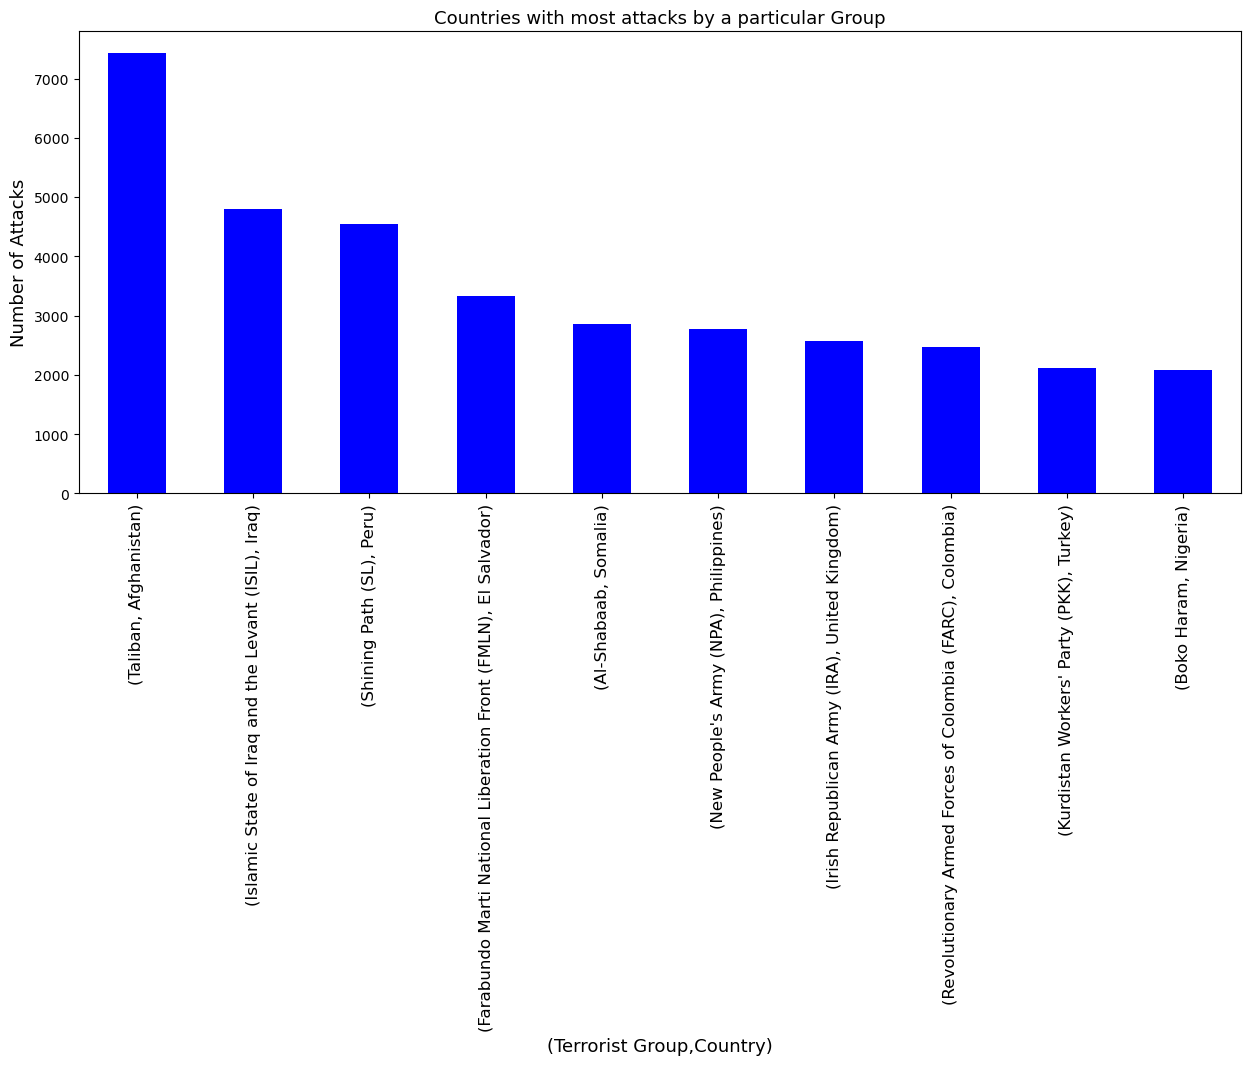

In [109]:
gca.head(10).plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [110]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_2632\2668093037.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


,,Casualty
Group Name,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


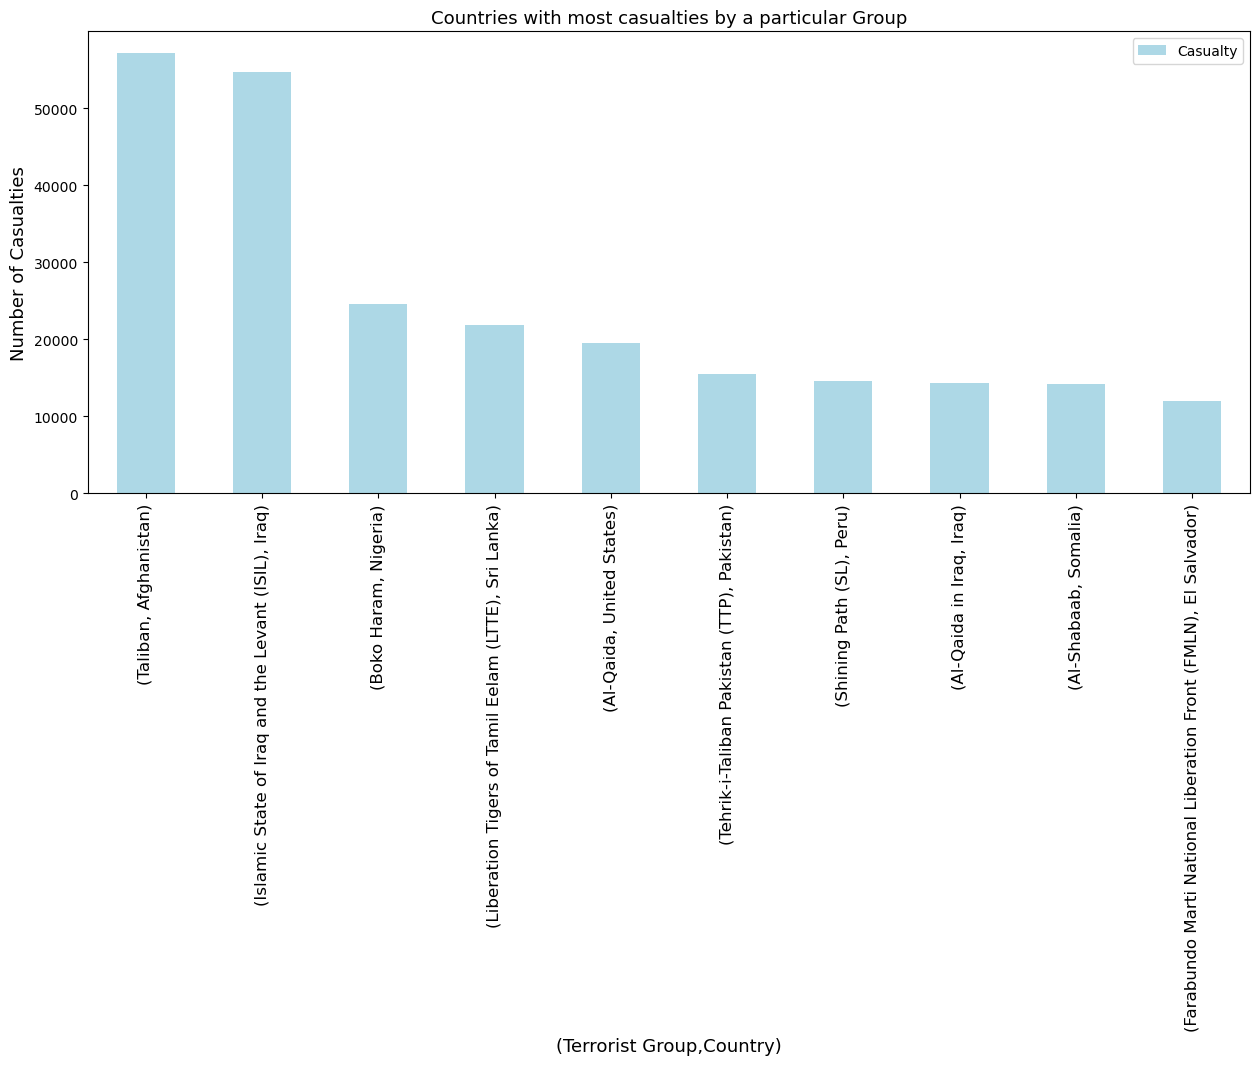

In [111]:
gcc.plot(kind="bar",color="lightblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [112]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

C:\Users\Sarvesh\AppData\Local\Temp\ipykernel_2632\3452644615.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


,,Killed
Group Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


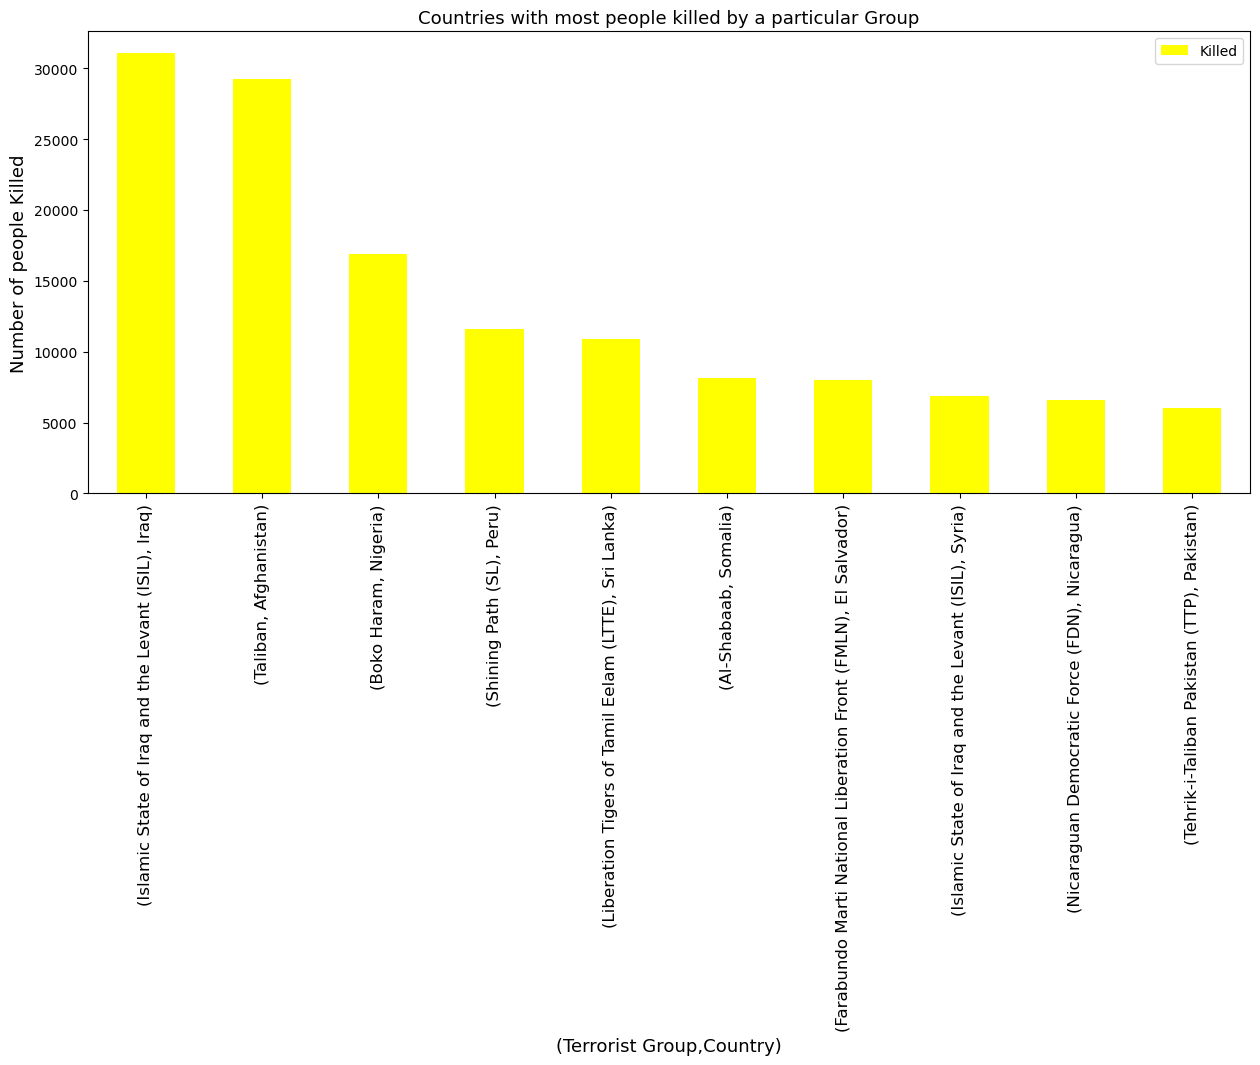

In [114]:
gck.plot(kind="bar",color="yellow",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

##  Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017


In [115]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


In [116]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


In [117]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


# Observations


Year wise Attacks :
  (i) Attacks
    (a) Most number of attacks: 16903 in 2014
    (b) Least number of attacks: 471 in 1971
  (ii) Casualties
    (a) Most number of casualties: 85618 in 2014
    (b) Least number of casualties: 255 in 1971
  (iii) Killed
    (a) Most number of people killed: 44490 in 2014
    (b) Least number of people killed: 173 in 1971
  (iv) Wounded
    (a) Most number of people wounded: 44043 in 2015
    (b) Least number of people wounded: 82 in 1971


2. Region wise Attacks :
  (i) Attacks
    (a) Most number of attacks: 50474 in "Middle East & North Africa"
    (b) Least number of attacks: 282 in "Australasia & Oceania"
  (ii) Casualties
    (a) Most number of casualties: 351950 in "Middle East & North Africa"
    (b) Least number of casualties: 410 in Australasia & Oceania
  (iii) Killed
    (a) Most number of people killed: 137642 in "Middle East & North Africa"
    (b) Least number of people killed: 150 in "Australasia & Oceania"
  (iv) Wounded
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"
    (b) Least number of people wounded: 260 in "Australasia & Oceania"


3. Country wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks: 24636 in "Iraq"
    (b) Least number of attacks: 4292 in "Turkey"
  (ii) Casualties
    (a) Most number of casualties: 213279 in "Iraq"
    (b) Least number of casualties: 22926 in "Philippines"
  (iii) Killed
    (a) Most number of people killed: 78589 in "Iraq"
    (b) Least number of people killed: 12053 in "El Salvador"
  (iv) Wounded
    (a) Most number of people wounded: 134690 in "Iraq"
    (b) Least number of people wounded: 10328 in "Colombia"


4. City wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks: 7589 in "Baghdad"
    (b) Least number of attacks: 1019 in "Athens"
  (ii) Casualties
    (a) Most number of casualties: 77876 in "Baghdad"
    (b) Least number of casualties: 5748 in "Aleppo"
  (iii) Killed
    (a) Most number of people killed: 21151 in "Baghdad"
    (b) Least number of people killed: 2125 in "Aleppo"
  (iv) Wounded
    (a) Most number of people wounded: 56725 in "Baghdad"
    (b) Least number of people wounded: 4955 in "Mogadishu"


5. Terrorist Group wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks : 7478 by "Taliban"
    (b) Least number of attacks : 2418 by "Boko Haram"
  (ii) Casualties
    (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"
  (iii) Killed
    (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"
  (iv) Wounded
    (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"

6. Attack Type wise Attacks:
  (i) Attacks
    (a) Most number of attacks : 88255 by "Bombing/Explosion"
    (b) Least number of attacks : 659 by "Hijacking"
  (ii) Casualties
    (a) Most number of casualties : 530007 by "Bombing/Explosion"
    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"
  (iii) Killed
    (a) Most number of people killed : 160297 by "Armed Assault"
    (b) Least number of people killed : 880 by "Unarmed Assault"
  (iv) Wounded
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"

7. Target Type wise Attacks:
  (i) Attacks
    (a) Most number of attacks : 43511 over "Private Citizens & Property"
    (b) Least number of attacks : 263 over "Abortion Related"
  (ii) Casualties
    (a) Most number of casualties : 319176 over "Private Citizens & Property"
    (b) Least number of casualties : 56 over "Abortion Related"
  (iii) Killed
    (a) Most number of people killed : 140504 over "Private Citizens & Property"
    (b) Least number of people killed : 10 over "Abortion Related"
  (iv) Wounded
    (a) Most number of people wounded : 178672 over "Private Citizens & Property"
    (b) Least number of people wounded : 46 over "Abortion Related"

8. Group and Country wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan"
    (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria"
  (ii) Casualties
    (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan"
    (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)" in "El Salvador"
  (iii) Killed
    (a) Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq"
    (b) Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan"
  (iv) Wounded
    (a) Most number of people wounded : 27871 by "Taliban" in "Afghanistan"
    (b) Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey"

9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 :
  (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737
  (ii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868
  (iii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869